# EDA and cleaning for raw analysts rating

## importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

## loading the data

In [2]:
try:
   # Attempt to read the CSV file
   df= pd.read_csv(r"C:\Users\tsion\OneDrive\Desktop\sentiment_analysis_price_pridiction_week1\data\raw_analyst_ratings.csv")
except FileNotFoundError:
   # Handle the case where the file does not exist
   print("The specified file was not found. Please check the file path.")
   
except pd.errors.EmptyDataError:
    # Handle the case where the file is empty
    print("The file is empty. Please provide a valid CSV file with data.")
print("CSV file loaded successfully.")

CSV file loaded successfully.


## Data profileing

In [3]:
# Basic info
print("head", df.head())
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

head    Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-0

## Discriptove statistics


Headline Length Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


C:\Users\tsion\AppData\Local\Temp\ipykernel_19584\621269406.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)



Date Range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00


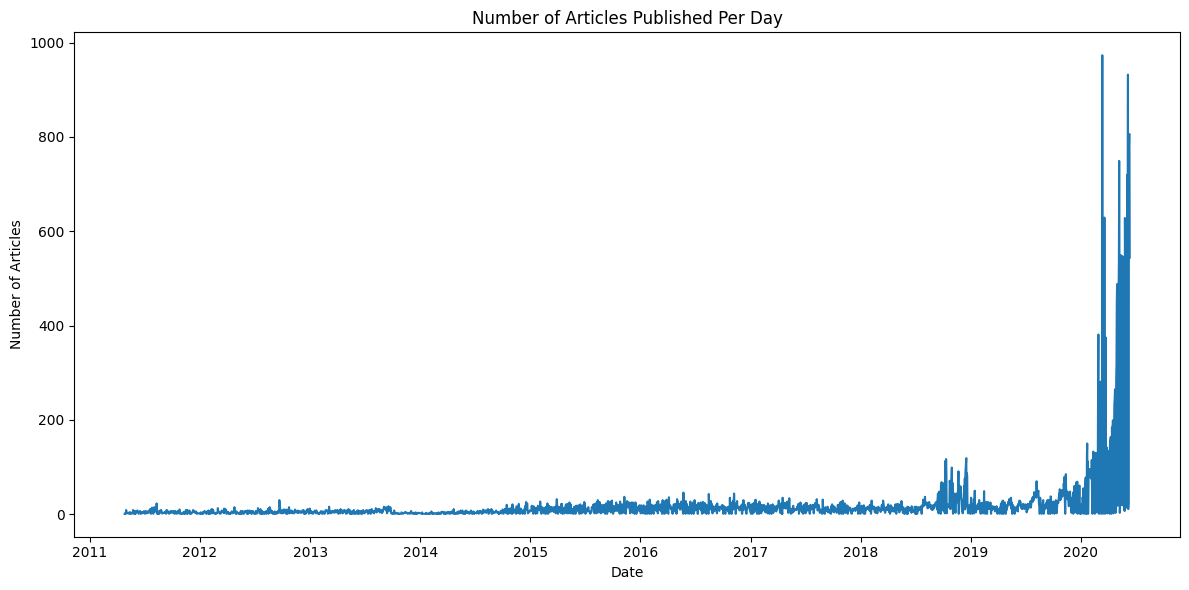

In [4]:
# Headline length
df['headline_length'] = df['headline'].str.len()
print("\nHeadline Length Stats:")
print(df['headline_length'].describe())

# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

# top 10 active publishers
print(publisher_counts.head(10))

#  Date analysis and publictaion date to see trends
df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
print("\nDate Range:", df['date'].min(), "to", df['date'].max())

articles_per_day = df.groupby(df['date'].dt.date).size()# group articles by date and count article per day
plt.figure(figsize=(12, 6))# plottig the trend over time
articles_per_day.plot()
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()